<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/project/final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Physical Activity Monitoring


In [ ]:
#load libraries

import numpy as np
import pandas as pd
import seaborn as sns

from pandas.plotting import scatter_matrix

from imblearn.over_sampling   import SMOTE
from imblearn.under_sampling  import RandomUnderSampler

from matplotlib import pyplot as plt

from joblib import dump, load

from sklearn.preprocessing    import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing    import StandardScaler
from sklearn                  import metrics
from sklearn.decomposition    import PCA
from sklearn.linear_model     import LogisticRegression
from sklearn.naive_bayes      import GaussianNB
from sklearn.ensemble         import RandomForestClassifier
from sklearn.svm              import SVC
from sklearn.metrics          import confusion_matrix

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Load Data

In [ ]:
#folder_structure = '/content/drive/My Drive/Intro_to_ML/final_project/dataset/' #change this to your correspoding folder
#folder_structure = '/content/drive/My Drive/final_project/dataset/' #Emilias link
folder_structure = '/content/drive/My Drive/IntroML/CSVFiles/dataset/' #Tim's Link

file_names = ['subject101.dat',
              'subject102.dat',
              'subject103.dat',
              'subject104.dat',
              'subject105.dat',
              'subject106.dat',
              'subject107.dat',
              'subject108.dat',
              'subject109.dat' ]

In [ ]:
file_names = [folder_structure + name for name in file_names ]

In [ ]:
subject_id = [1,2,3,4,5,6,7,8,9]

activity_id_dict = {0: 'transient',
                    1: 'lying',
                    2: 'sitting',
                    3: 'standing',
                    4: 'walking',
                    5: 'running',
                    6: 'cycling',
                    7: 'Nordic_walking',
                    9: 'watching_TV',
                    10: 'computer_work',
                    11: 'car driving',
                    12: 'ascending_stairs',
                    13: 'descending_stairs',
                    16: 'vacuum_cleaning',
                    17: 'ironing',
                    18: 'folding_laundry',
                    19: 'house_cleaning',
                    20: 'playing_soccer',
                    24: 'rope_jumping' }

special_columns = ["timestamp", "activity_id","heartrate"]


imu_hand = ['hand_temperature',
            'hand_Acc6_1',       'hand_Acc6_2',        'hand_Acc6_3',
            'hand_Acc16_1',      'hand_Acc16_2',       'hand_Acc16_3',
            'hand_Gyro1',        'hand_Gyro2',         'hand_Gyro3',
            'hand_Magne1',       'hand_Magne2',        'hand_Magne3',
            'hand_Orientation1', 'hand_Orientation2',  'hand_Orientation3', 'hand_Orientation4']

imu_chest = ['chest_temperature',
             'chest_Acc16_1',       'chest_Acc16_2',      'chest_Acc16_3',
             'chest_Acc6_1',        'chest_Acc6_2',       'chest_Acc6_3',
             'chest_Gyro1',         'chest_Gyro2',        'chest_Gyro3',
             'chest_Magne1',        'chest_Magne2',       'chest_Magne3',
             'chest_Orientation1',  'chest_Orientation2', 'chest_Orientation3', 'chest_Orientation4']

imu_ankle = ['ankle_temperature',
           'ankle_Acc16_1',       'ankle_Acc16_2',      'ankle_Acc16_3',
           'ankle_Acc6_1',        'ankle_Acc6_2',       'ankle_Acc6_3',
           'ankle_Gyro1',         'ankle_Gyro2',        'ankle_Gyro3',
           'ankle_Magne1',        'ankle_Magne2',       'ankle_Magne3',
           'ankle_Orientation1',  'ankle_Orientation2', 'ankle_Orientation3', 'ankle_Orientation4']

columns = special_columns + imu_hand + imu_chest + imu_ankle  #put columns in one list

len(columns)

54

In [ ]:
raw_data = pd.DataFrame()
for file in file_names:
    buffer = pd.read_table(file, header=None, sep='\s+')
    buffer.columns = columns #name columns
    buffer['subject_id'] = int(file[-5]) #add subject number to table (from filename)
    raw_data = pd.concat([raw_data, buffer], ignore_index=True)

raw_data.reset_index(drop=True, inplace=True)
raw_data.head()

,timestamp,activity_id,heartrate,hand_temperature,hand_Acc6_1,hand_Acc6_2,hand_Acc6_3,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,...,ankle_Gyro2,ankle_Gyro3,ankle_Magne1,ankle_Magne2,ankle_Magne3,ankle_Orientation1,ankle_Orientation2,ankle_Orientation3,ankle_Orientation4,subject_id
0,8.38,0,104.0,30.0,2.37223,8.60074,3.51048,2.43954,8.76165,3.35465,...,0.009250,-0.017580,-61.1888,-38.9599,-58.1438,1.0,0.0,0.0,0.0,1
1,8.39,0,NaN,30.0,2.18837,8.56560,3.66179,2.39494,8.55081,3.64207,...,-0.004638,0.000368,-59.8479,-38.8919,-58.5253,1.0,0.0,0.0,0.0,1
2,8.40,0,NaN,30.0,2.37357,8.60107,3.54898,2.30514,8.53644,3.73280,...,0.000148,0.022495,-60.7361,-39.4138,-58.3999,1.0,0.0,0.0,0.0,1
3,8.41,0,NaN,30.0,2.07473,8.52853,3.66021,2.33528,8.53622,3.73277,...,-0.020301,0.011275,-60.4091,-38.7635,-58.3956,1.0,0.0,0.0,0.0,1
4,8.42,0,NaN,30.0,2.22936,8.83122,3.70000,2.23055,8.59741,3.76295,...,-0.014303,-0.002823,-61.5199,-39.3879,-58.2694,1.0,0.0,0.0,0.0,1


## Data Cleaning

Additional files that come with the dataset explain how the data was gathered and give information on which parts of the data can be used.

* remove transient activity(id == 0), no usefull data
* remove columns 'Orientation' --> not used in information gathering
* remove columns 'accelerometer 6g' --> was not precicly calibrated during the data aquisition

* remove subject 9 --> connection loss to the dongles, no data

* remove timestamp, since it doesnt contain any meaningful information correlated to the activity performed at the time

* remove subject id

* interpolate missing values due to:
  * different frequencies (heartrate sensor - 9Hz, IMUs 100Hz)
  * connection lost, package drops in wireless transmission



In [ ]:
data = raw_data.drop(['hand_Orientation1',   'hand_Orientation2',  'hand_Orientation3',  'hand_Orientation4',
                      'chest_Orientation1',  'chest_Orientation2', 'chest_Orientation3', 'chest_Orientation4',
                      'ankle_Orientation1',  'ankle_Orientation2', 'ankle_Orientation3', 'ankle_Orientation4'],
                    axis = 1)  # removal of orientation columns

data = data.drop(['hand_Acc6_1',  'hand_Acc6_2',   'hand_Acc6_3',
                  'chest_Acc6_1', 'chest_Acc6_2',  'chest_Acc6_3',
                  'ankle_Acc6_1', 'ankle_Acc6_2',  'ankle_Acc6_3',],
                    axis = 1) # remove columns of accelerometer6g

data = data.drop(data[data.subject_id == 9].index) #(maybe not even load in first place ...)

In [ ]:
#linear interpolation
data = data.interpolate() #interpolate before transient activity gets removed

In [ ]:
data = data.drop(data[data.activity_id == 0].index) #remove any row of activity 0 (transient)

data = data.drop(['timestamp', 'subject_id'], axis = 1)

#remove all activities which only one person did
data = data.drop(data[data.activity_id == 9].index)  #remove watching TV
data = data.drop(data[data.activity_id == 11].index)  #remove car driving
data = data.drop(data[data.activity_id == 20].index)  #remove playing soccer

In [ ]:
data.reset_index(drop = True, inplace = True)
data.head()

,activity_id,heartrate,hand_temperature,hand_Acc16_1,hand_Acc16_2,hand_Acc16_3,hand_Gyro1,hand_Gyro2,hand_Gyro3,hand_Magne1,...,ankle_temperature,ankle_Acc16_1,ankle_Acc16_2,ankle_Acc16_3,ankle_Gyro1,ankle_Gyro2,ankle_Gyro3,ankle_Magne1,ankle_Magne2,ankle_Magne3
0,1,100.0,30.375,2.24689,8.55387,5.77143,-0.004750,0.037579,-0.011145,8.93200,...,30.75,9.73855,-1.84761,0.095156,0.002908,-0.027714,0.001752,-61.1081,-36.8636,-58.3696
1,1,100.0,30.375,2.27373,8.14592,5.78739,-0.171710,0.025479,-0.009538,9.58300,...,30.75,9.69762,-1.88438,-0.020804,0.020882,0.000945,0.006007,-60.8916,-36.3197,-58.3656
2,1,100.0,30.375,2.26966,7.66268,5.78846,-0.238241,0.011214,0.000831,9.05516,...,30.75,9.69633,-1.92203,-0.059173,-0.035392,-0.052422,-0.004882,-60.3407,-35.7842,-58.6119
3,1,100.0,30.375,2.22177,7.25535,5.88000,-0.192912,0.019053,0.013374,9.92698,...,30.75,9.66370,-1.84714,0.094385,-0.032514,-0.018844,0.026950,-60.7646,-37.1028,-57.8799
4,1,100.0,30.375,2.20720,7.24042,5.95555,-0.069961,-0.018328,0.004582,9.15626,...,30.75,9.77578,-1.88582,0.095775,0.001351,-0.048878,-0.006328,-60.2040,-37.1225,-57.8847


In [ ]:
data.isnull().sum() #check for missing values left after interpolation

activity_id          0
heartrate            0
hand_temperature     0
hand_Acc16_1         0
hand_Acc16_2         0
hand_Acc16_3         0
hand_Gyro1           0
hand_Gyro2           0
hand_Gyro3           0
hand_Magne1          0
hand_Magne2          0
hand_Magne3          0
chest_temperature    0
chest_Acc16_1        0
chest_Acc16_2        0
chest_Acc16_3        0
chest_Gyro1          0
chest_Gyro2          0
chest_Gyro3          0
chest_Magne1         0
chest_Magne2         0
chest_Magne3         0
ankle_temperature    0
ankle_Acc16_1        0
ankle_Acc16_2        0
ankle_Acc16_3        0
ankle_Gyro1          0
ankle_Gyro2          0
ankle_Gyro3          0
ankle_Magne1         0
ankle_Magne2         0
ankle_Magne3         0
dtype: int64

## Visualization



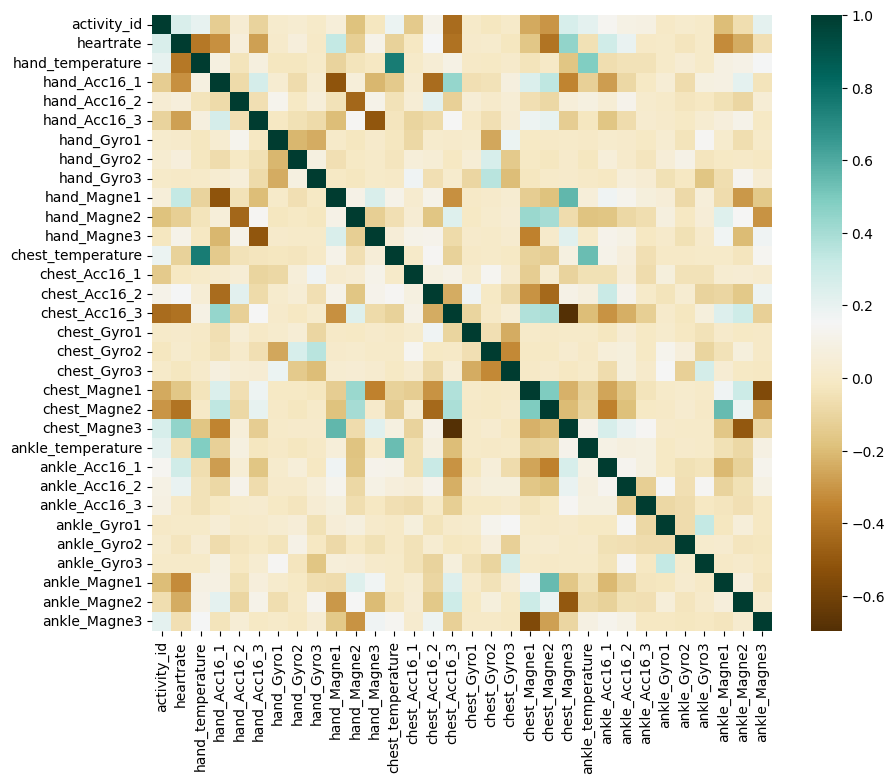

In [ ]:
#correlation heat map

df_corr = data.corr()
f, ax = plt.subplots(figsize=(10, 8))


#creat mask to find features with weak explanatory strenght
#mask = (np.abs(df_corr) <= 0.1)
#--> gyroscope does not seem to have relevant information

#sns.heatmap(df_corr, cmap = "BrBG",ax=ax, mask=mask)
sns.heatmap(df_corr, cmap = "BrBG",ax=ax)

plt.show()

Guess:
The **Gyroscope** does seem to have weak correlation with everything
* try training without gyro

--> Training without gyro led to significantly worse performance (see confusion matrix)

In [ ]:
#drop gyroscope data

'''
data = data.drop(['hand_Gyro1',  'hand_Gyro2',  'hand_Gyro3',
                  'chest_Gyro1', 'chest_Gyro2', 'chest_Gyro3',
                  'ankle_Gyro1', 'ankle_Gyro2', 'ankle_Gyro3'
                  ], axis = 1)

data.reset_index(drop = True, inplace = True)
'''

"\ndata = data.drop(['hand_Gyro1',  'hand_Gyro2',  'hand_Gyro3',\n                  'chest_Gyro1', 'chest_Gyro2', 'chest_Gyro3',\n                  'ankle_Gyro1', 'ankle_Gyro2', 'ankle_Gyro3'\n                  ], axis = 1)\n\ndata.reset_index(drop = True, inplace = True)\n"

## Data Distribution

<Axes: >

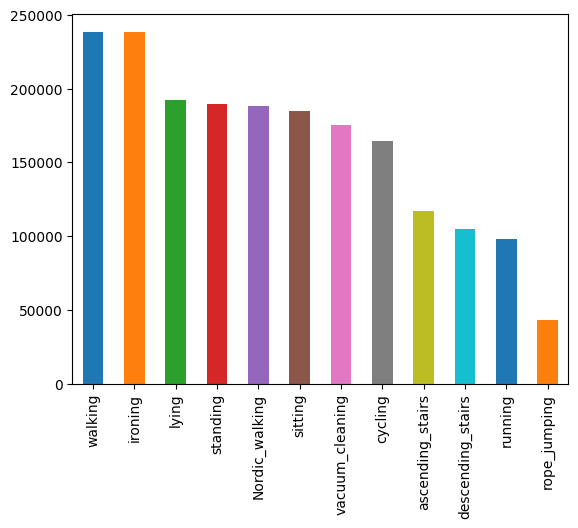

In [ ]:
class_distribution = data['activity_id'].value_counts()

class_distribution.index = class_distribution.index.map(activity_id_dict)
c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
class_distribution.plot(kind='bar', color=c)

The distribution over the classes is imbalanced.
* up and downsample some of the classes to balance the datas

In [ ]:
#split for resampling

col = data.columns
x_cols = col[1:]


y_df = data['activity_id']
x_df = data[x_cols]

In [ ]:
class_distribution

walking              238761
ironing              238690
lying                192523
standing             189931
Nordic_walking       188107
sitting              185188
vacuum_cleaning      175353
cycling              164600
ascending_stairs     117216
descending_stairs    104944
running               98199
rope_jumping          42969
Name: activity_id, dtype: int64

In [ ]:
#naive resampling --> random undersampling --> deleting random samples of the majority class

#brings everything to size of cycling
undersample_dict = {4 :164600,
                   17 :164600,
                    1 :164600,
                    3 :164600,
                    7 :164600,
                    2 :164600,
                   16 :164600}

undersampler = RandomUnderSampler(sampling_strategy=undersample_dict, random_state=100)
data_resampled, y_res = undersampler.fit_resample(x_df, y_df) #takes really long



#upsample the other actvities
# ascending_stairs, descending_stairs, running, rope_jumping
oversample_dict = {12 : 164600,
                   13 : 164600,
                    5 : 164600,
                   24 : 164600}

#oversample data using SMOTE
sm = SMOTE(sampling_strategy=oversample_dict, random_state=100)
data_resampled, y_res = sm.fit_resample(data_resampled, y_res) #takes really long


data_resampled['activity_id'] = y_res #put back together
#data_resampled.head()

In [ ]:
class_distribution = data_resampled['activity_id'].value_counts()

class_distribution.index = class_distribution.index.map(activity_id_dict)
class_distribution

lying                164600
sitting              164600
standing             164600
walking              164600
running              164600
cycling              164600
Nordic_walking       164600
ascending_stairs     164600
descending_stairs    164600
vacuum_cleaning      164600
ironing              164600
rope_jumping         164600
Name: activity_id, dtype: int64

## Scale, Randomize, Split

In [ ]:
#Scale
col = data.columns
columns_to_scale = col[1:] #everything but labels
scaled_data = data_resampled #make copy

#Choose Scaling Approach
scaler = MinMaxScaler() #way better results than standardscaler

# apply scaler
scaled_data[columns_to_scale] = scaler.fit_transform(data_resampled[columns_to_scale])

### --- Run until here, at startup ---

In [ ]:
'''
# use this paragraph, to train with unbalanced data !!!

col = data.columns
columns_to_scale = col[1:] #everything but labels
scaled_data = data

scaler = MinMaxScaler() #way better results than standardscaler
# apply scaler
scaled_data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])
'''

'\n# use this paragraph, to train with unbalanced data !!!\n\ncol = data.columns\ncolumns_to_scale = col[1:] #everything but labels\nscaled_data = data\n\nscaler = MinMaxScaler() #way better results than standardscaler\n# apply scaler\nscaled_data[columns_to_scale] = scaler.fit_transform(data[columns_to_scale])\n'

In [ ]:
#split 80/20 and randomize

df_train, df_val = train_test_split(scaled_data, train_size = 0.8, test_size = 0.2, random_state = 100)

In [ ]:
# seperate x from y
y_train = df_train.pop('activity_id')
y_val   = df_val.pop('activity_id')

# convert to numpy array
y_train = y_train.to_numpy()
y_val = y_val.to_numpy()

x_train = df_train.to_numpy()
x_val = df_val.to_numpy()

In [ ]:
x_train.shape

(1580160, 31)

In [ ]:
#PCA
k = 15 #optimal value to be found
pca = PCA(n_components=k)

pc_train = pca.fit_transform(x_train)
pc_val = pca.fit_transform(x_val)

## Classifiers

In [ ]:
#Logistic Regression

clf = LogisticRegression(solver='saga', penalty="l2", max_iter=300) #try different solvers and penalties
clf.fit(pc_train, y_train)
y_pred = clf.predict(pc_val)

In [ ]:
#Naive Bayesianx

#clf = GaussianNB()
#clf.fit(pc_train, y_train)
#y_pred = clf.predict(pc_val)

## Evaluation

Text(0.5, 47.5815972222222, 'Predicted label')

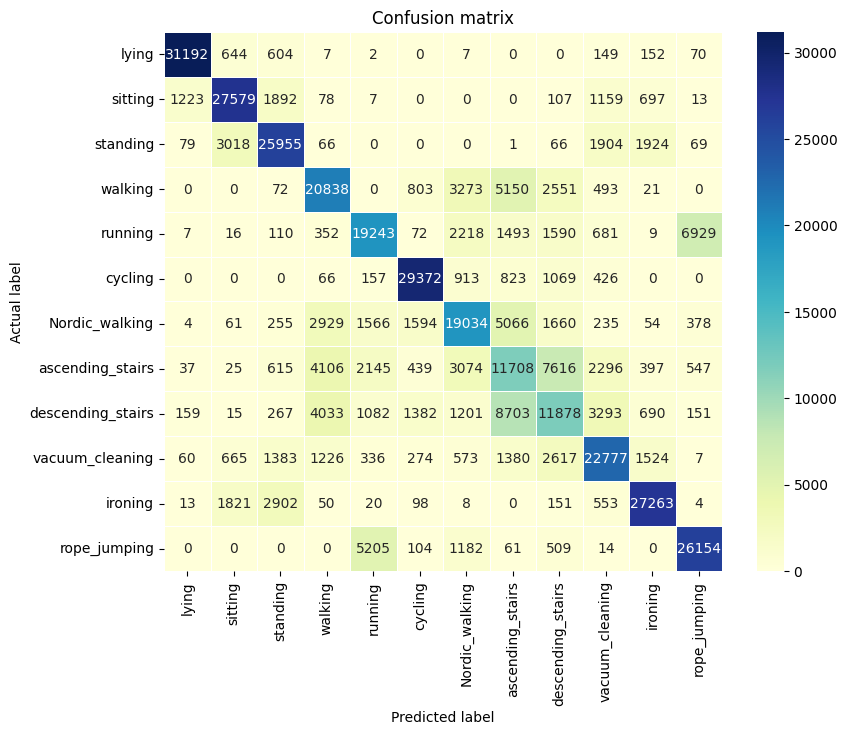

In [ ]:
#confusion matrix
cnf_matrix = confusion_matrix(y_val, y_pred)

class_labels = np.vectorize(activity_id_dict.get)(clf.classes_)

# create heatmap
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',linewidths=0.5,  xticklabels=class_labels, yticklabels=class_labels, ax=ax)

plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#Performance

recall = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1)
precision = np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0)
f1_score = (2*recall*precision) / (recall+precision)

d = {'activity':class_labels, 'precision':precision, 'recall':recall, 'f1-score':f1_score}
performance = pd.DataFrame(data = d)
performance

,activity,precision,recall,f1-score
0,lying,0.951730,0.950193,0.950961
1,sitting,0.814886,0.841978,0.828211
2,standing,0.762149,0.784566,0.773195
3,walking,0.617404,0.627632,0.622476
4,running,0.646541,0.588111,0.615944
5,cycling,0.860390,0.894779,0.877247
6,Nordic_walking,0.604580,0.579669,0.591862
7,ascending_stairs,0.340497,0.354734,0.347470
8,descending_stairs,0.398403,0.361539,0.379077
9,vacuum_cleaning,0.670306,0.693955,0.681926


In [ ]:
precision_mean = np.sum(performance['precision']) / performance.shape[0]
recall_mean = np.sum(performance['recall']) / performance.shape[0]
f1_mean = np.sum(performance['f1-score']) / performance.shape[0]

#print("Accuracy:   %.4f" % (correct_val / total_val))
print("Precsision: %.4f" % precision_mean)
print("Recall:     %.4f" % recall_mean)
print("F1-score:   %.4f" % f1_mean)


Precsision: 0.6885
Recall:     0.6911
F1-score:   0.6895


In [ ]:
'''
#store model in file
path = '/content/drive/My Drive/final_project/models/'
model_name = 'up_and_down_sampled.joblib'
model_path = path+model_name

dump(clf, model_path)
'''

"\n#store model in file\npath = '/content/drive/My Drive/final_project/models/'\nmodel_name = 'up_and_down_sampled.joblib'\nmodel_path = path+model_name\n\ndump(clf, model_path)\n"

In [ ]:
'''

#load model from file
path = '/content/drive/My Drive/final_project/models/'
model_name = 'without_gyro.joblib'
model_path = path+model_name

clf = load(model_path)
y_pred = clf.predict(pc_val)

'''

"\n\n#load model from file\npath = '/content/drive/My Drive/final_project/models/'\nmodel_name = 'without_gyro.joblib'\nmodel_path = path+model_name\n\nclf = load(model_path)\ny_pred = clf.predict(pc_val)\n\n"

# Neural Network

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

from torch.utils.data import DataLoader

In [ ]:
#Split the data set into training and val
df_train, df_val = train_test_split(scaled_data, train_size = 0.8, test_size = 0.2, random_state = 100)


# seperate x from y
y_train_df = df_train.pop('activity_id')
y_val_df   = df_val.pop('activity_id')



# convert to numpy array
y_train_np = y_train_df.to_numpy()
y_val_np = y_val_df.to_numpy()

x_train_np = df_train.to_numpy()
x_val_np = df_val.to_numpy()



#to tensor
y_train = torch.tensor(y_train_np, dtype=torch.float32).reshape(-1, 1)
y_val   = torch.tensor(y_val_np, dtype=torch.float32).reshape(-1, 1)

X_train = torch.tensor(x_train_np, dtype=torch.float32)
X_val  = torch.tensor(x_val_np, dtype=torch.float32)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

# Assuming you have ytrain, xtrain, yval, and xval as PyTorch tensors
# Make sure to adjust the code according to your specific data processing steps

# Define the neural network for 54 features
class SimpleNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 512)  # Adjust input size to match the number of features
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(512, output_size)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Assuming xtrain and xval have 54 features, adjust input_size accordingly
input_size = 31
output_size = 12  # Adjust based on the number of classes in your task

# Instantiate the model and move it to the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleNN(input_size, output_size).to(device)

# Combine xtrain and ytrain into a training dataset
train_dataset = TensorDataset(X_train, y_train.squeeze().long())  # Squeeze to remove potential extra dimensions

# Combine xval and yval into a validation dataset
val_dataset = TensorDataset(X_val, y_val.squeeze().long())

# Create DataLoader for training and validation
batch_size = 64  # Adjust as needed
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
num_epochs = 10  # Adjust as needed
for epoch in range(num_epochs):
    # Training
    model.train()
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()

            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    avg_val_loss = val_loss / len(val_loader)
    accuracy = correct / total

    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Validation Loss: {avg_val_loss}, Accuracy: {accuracy}')


RuntimeError: ignored

In [ ]:
#model
'''
input_dim  = 31  # input features
output_dim = 12  # no. of activities

n_layer1 = 64
n_layer2 = 128
n_layer3 = 64

model = nn.Sequential(
            nn.Linear(input_dim, n_layer1), #layer 1
            nn.Tanh(),
            nn.Linear(n_layer1, n_layer2), # layer 2
            nn.Tanh(),
            nn.Linear(n_layer2, n_layer3), # layer 3
            nn.Tanh(),
            nn.Linear(n_layer3, output_dim),
            nn.LogSoftmax(dim=1))

'''

#pseudo model

input_dim  = 31  # input features
output_dim = 12

n_layer1 = 128

model = nn.Sequential(
            nn.Linear(input_dim, n_layer1), #layer 1
            nn.Tanh(),
            nn.Linear(n_layer1, output_dim),
            nn.LogSoftmax(dim=1))


In [ ]:
train_loader = DataLoader(list(zip(x_train, y_train)), shuffle=True, batch_size=16)

for x_batch, y_batch in train_loader:
    print(x_batch.shape)
    print(y_batch.shape)
    break

In [ ]:
#everything after

In [ ]:
train_loader = DataLoader(list(zip(x_train, y_train)), shuffle=True, batch_size=16)

learning_rate = 0.01
n_epochs = 10

optimizer = optim.SGD(model.parameters(), lr=learning_rate) #adma/sgd?

loss_fn = nn.NLLLoss()

loss_history = []

#start_time = datetime.datetime.now()

for epoch in range(n_epochs):
    for x_batch, y_batch in train_loader:

        y_pred = model(x_batch)

        loss = loss_fn(y_pred, y_batch) #<-- something wrong here
        #loss = loss_fn(y_pred, torch.max(y_batch, 1)[1]) #this feels wrong, doesnt make sense

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
    loss_history.append(loss.item())

#end_time = datetime.datetime.now()

In [ ]:
#!!! careful, dont override other models !!!

model_path = '/content/drive/My Drive/final_project/models/'


#torch.save(model.state_dict(), model_path + 'nn_10e_v2.pt')



#Load model

#model.load_state_dict(torch.load(file_path+'p2b_0.001.pt'))